# Project - Data Visualisation based on 311 Service Requests, Census Demographics and Crimes in Baltimore 


### Problem Statement :
> To find a relationship between the services requested by the population of different age groups in a neighborhood. Also, to find a relationship of crime rates with respect to the services requested. For this, 3 datasets were explored - Census Demographics, Crime by Neighborhood and 311 Customer Service Requests. 

### Description:
> We have found the relationship between Services Requested in particular neighborhood and the census demographics. For example, as the population increases, number of service requests also increases. We also evaluated majority of age groups in particular neighborhood and type of requests that were majorly created in that particular area.  Also, we found that the method of creating requests varied based on the age group in that particular neighborhood. For example, if a particular neighborhood contains large number of young crowd, it will evidently show large number of internet reported service requests. 
Also, we related Crime by neighborhood dataset with 311 Service requests by comparing crime rate and the requests rate. This explains the relationship between the number of requests raised and the number of crimes committed in a neighborhood. Another thing that we concluded based on plots is that the areas with higher population shows maximum number of crimes. 


### About Datasets
> <p> Here, We are fetching 3 datasets viz- 1) District 311 Service Request dataset present in City service section of Open Baltimore 2) Crime by neighborhood present in Crime section of Open Baltimore 3) Census Neighborhoods dataset found on Data.gov website.(All the columns are similar to Census dataset from Open Baltimore. But the neighborhood values from 311 Service requests and Crime did not match. Therefore, chosen to use it from Data.gov)
  </p>
  <p> Service Type tells you about the type of issue that is raised, for example, housing and community development (HCD), transportation roadway maintenance (e.g. fixing potholes), etc.
Method Received tells us about the mode of communicating the request. It can be Phone, API or Internal. 
Some important dates in context of Service requests are also provided like Due date, created date and Status date. 
Also the timestamp of the last activity that is performed for the particular request is also mentioned. 
  </p>
  <p> Census by Neighborhood dataset consists of Neighborhood, total population in that neighborhood, total female and male population, percentage of population in different age groups like 0-4,5-11,65 above, etc. 
   </p>
  <p> Crime dataset consists of crime date, crime code which states the type of crime that is committed, neighborhood where the crime was committed, location states actual location of crime, description describes the crime, weapon that was used and district. 
  </p>
  
### How is it useful?
> <p> <ul> <li> The data consists of details about every phone call, query, complaint and request addressed by the 311 system adopted by Baltimore government. This dataset is useful to address how the service requests were handled by government workers and the type of problems that bothered Baltimore citizens the most.</li> 
    <li> Crime dataset and census demographics dataset gives the overall information about the crimes and population in baltimore. Census demographic dataset will be very useful to check what is the majority age group in particular neighborhood of baltimore. Crimes gives idea about the type of crimes and the details about the type of crime in every neighborhood of baltimore.
    </li>
</ul></p>


### 1. Initially import all the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

### 2. Now fetch the dataset downloaded from Open Baltimore website


In [3]:
df = pd.read_csv("D:\MS CS Sem 1\DS\Assignment 1\Dbs\District_4_311_Service_Requests.csv")

In [4]:
df2 = pd.read_csv("D:\MS CS Sem 1\DS\Project\Dataset\Census_Neighborhoods.csv", low_memory = False)

In [5]:
df3 = pd.read_csv("D:\MS CS Sem 1\DS\Project\Dataset\Crime_By_Neighborhood.csv")

In [6]:
df.shape

(20685, 13)

In [7]:
df2.shape

(278, 37)

In [8]:
df3.shape

(49559, 7)

It shows that the service requests dataset consists of <b>20685 rows</b> and <b>13 columns</b>.
Whereas Census Demographic dataset consists of <b>56 rows</b> and <b>28 columns</b>. And Crime by neighborhood contains <b> 49559 rows</b> and <b>7 columns</b>.

### Drawing connections between three datasets: 
> <p><b> The essence of our connections between three datasets lies in 'Neighborhood' column. All the three datasets i.e. Crime by neighborhood, Census Demographics and 311 service requests revolves around neighborhood. So based on this field, we were able to merge all the datasets. This was also a reason why we could find out the relationships between them. 
    </b></p>
### Why was this a good idea?
> <p><b> Since the crimes can be compared with service requests, service requests can be compared with both Crimes and Population and Population can be compared with Crimes using neighborhood, we thought this was a good choice. 
    </b></p>

### 3. Checking all the columns available and selecting few amongst them

In [9]:
df.columns

Index(['ServiceRequestNum', 'SRType', 'Neighborhood', 'Address', 'ZipCode',
       'MethodReceived', 'CreatedDate', 'DueDate', 'StatusDate', 'SRStatus',
       'LastActivity', 'Outcome', 'LastActivityDate'],
      dtype='object')

In [10]:
df_service = df[['ServiceRequestNum','SRType','MethodReceived','CreatedDate','StatusDate','DueDate','LastActivityDate','Neighborhood']]

In [11]:
df_census = df2.reindex(columns=['Name','Population','Male','Female','AGE0_4','AGE5_11','AGE12_14','AGE15_17','AGE18_24','AGE25_34','AGE35_44','AGE45_64','AGE65ovr'])

Change the column names called 'CSA2010' to 'Neighborhood' and 'tpop10' to Population

In [12]:
df_census = df_census.rename(columns={"Name":"Neighborhood"})

Dataframe df_service now contains only the required 7 columns and df_census1 contains 13. 

### 4. Now let's fetch first few records of both the datasets. 

In [13]:
df_service.head()

,ServiceRequestNum,SRType,MethodReceived,CreatedDate,StatusDate,DueDate,LastActivityDate,Neighborhood
0,15-00000620,BGE-StLight(s) Out,API,1/1/2015 17:45,1/2/2015,1/5/2015,NaN,Radnor-Winston
1,15-00000187,TRS-Abandoned Vehicle,Phone,1/1/2015 10:25,1/8/2015,1/6/2015,NaN,Chinquapin Park
2,15-00000217,TRM-Pothole Repair,API,1/1/2015 10:54,1/2/2015,1/3/2015,1/2/2015,Chinquapin Park
3,15-00000236,BGE-StLight(s) Out,Phone,1/1/2015 11:09,1/2/2015,1/5/2015,NaN,Glen Oaks
4,15-00000241,BGE-StLight(s) Out,Phone,1/1/2015 11:14,1/2/2015,1/5/2015,NaN,Woodbourne Heights


In [14]:
df_census.head()

,Neighborhood,Population,Male,Female,AGE0_4,AGE5_11,AGE12_14,AGE15_17,AGE18_24,AGE25_34,AGE35_44,AGE45_64,AGE65ovr
0,Abell,889.0,424.0,465.0,55.0,43.0,5.0,10.0,118.0,254.0,149.0,186.0,69.0
1,Allendale,3554.0,1536.0,2018.0,179.0,315.0,136.0,181.0,317.0,383.0,315.0,1039.0,689.0
2,Arcadia,1235.0,592.0,643.0,101.0,85.0,40.0,55.0,116.0,188.0,164.0,380.0,106.0
3,Boyd-Booth,822.0,408.0,414.0,60.0,94.0,26.0,40.0,98.0,106.0,89.0,232.0,77.0
4,Arlington,2598.0,1219.0,1379.0,148.0,237.0,92.0,114.0,231.0,297.0,305.0,775.0,399.0


In [15]:
df3.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
0,1/1/2012,4A,500 CHATEAU AV,AGG. ASSAULT,FIREARM,NORTHERN,Winston-Govans
1,1/1/2012,4E,2200 W NORTH AV,COMMON ASSAULT,HANDS,WESTERN,Coppin Heights/Ash-Co-Eas
2,1/1/2012,4E,0 S LINWOOD AV,COMMON ASSAULT,HANDS,SOUTHEASTERN,Patterson Park Neighborho
3,1/1/2012,6D,5600 LOCH RAVEN BD,LARCENY FROM AUTO,NaN,NORTHEASTERN,Loch Raven
4,1/1/2012,6D,6300 PIONEER DR,LARCENY FROM AUTO,NaN,NORTHEASTERN,Hamilton Hills


> - There are many missing values present in LastActivityDate column. 
> - The data types of 3 date columns varies. Columns with the missing values can not be used for service requests analysis.
> - There are 4 types of Methods for Receiving requests. 4 different types of values are present in column 'MethodReceived'

### 5. Working with missing values in datasets: 

Drop the null values present in Service and Crime dataset. Also, we deleted null values in Services. The reason for deleting these values was that, it might impact the results that we concluded.

In [16]:
len(df_service)

20685

In [17]:
df_service = df_service.dropna()

In [18]:
len(df_service)

14943

In [19]:
df_crime = df3.dropna()
len(df_crime)

17141

In [20]:
df_crime

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
0,1/1/2012,4A,500 CHATEAU AV,AGG. ASSAULT,FIREARM,NORTHERN,Winston-Govans
1,1/1/2012,4E,2200 W NORTH AV,COMMON ASSAULT,HANDS,WESTERN,Coppin Heights/Ash-Co-Eas
2,1/1/2012,4E,0 S LINWOOD AV,COMMON ASSAULT,HANDS,SOUTHEASTERN,Patterson Park Neighborho
6,1/1/2012,4E,500 N GLOVER ST,COMMON ASSAULT,HANDS,SOUTHEASTERN,McElderry Park
7,1/1/2012,4E,4900 GOODNOW RD,COMMON ASSAULT,HANDS,NORTHEASTERN,Frankford
11,1/1/2012,4C,500 LONEYS LA,AGG. ASSAULT,OTHER,SOUTHEASTERN,Ellwood Park/Monument
12,1/1/2012,4E,1500 GORSUCH AV,COMMON ASSAULT,HANDS,NORTHEASTERN,Coldstream Homestead Mont
14,1/1/2012,4C,400 E BALTIMORE ST,AGG. ASSAULT,OTHER,CENTRAL,Downtown
18,1/1/2012,4E,300 N HIGHLAND AV,COMMON ASSAULT,HANDS,SOUTHEASTERN,Baltimore Highlands
20,1/1/2012,4C,2000 GRINNALDS AV,AGG. ASSAULT,OTHER,SOUTHWESTERN,Morrell Park


Creating a copy of census dataframe. Deleting the rows where Population is equal to zero.Population in any of the neighborhood can not be equal to zero. Such values from the dataset must thus be removed.

In [21]:
df_census1 = df_census
columns=['Population']
len(df_census1)

278

In [22]:
df_census1 = df_census1.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns).fillna(0)

In [23]:
len(df_census1)

256

## 6. Computing new column using existing columns to derive useful information

##### Since the request created date and Date of the last activity performed is present in the above dataset, We'll calculate the number of days required to resolve each request. We'll assign 'Number of Days' to dataframe as a new column
##### Also, Young Citizens column will be created using addition of columns upto 35-44 age groups. 
##### Similarly, senior Citizen column is created using addition of columns having age group higher that 44. 

In [24]:
import datetime
df_service.LastActivityDate = pd.to_datetime(df_service.LastActivityDate)
df_service.DueDate = pd.to_datetime(df_service.DueDate)
df_service.CreatedDate = pd.to_datetime(df_service.CreatedDate)

df_service = df_service.assign(DaysRequired = df_service.LastActivityDate - df_service.CreatedDate + datetime.timedelta(days=1))

In [25]:
df_service.columns

Index(['ServiceRequestNum', 'SRType', 'MethodReceived', 'CreatedDate',
       'StatusDate', 'DueDate', 'LastActivityDate', 'Neighborhood',
       'DaysRequired'],
      dtype='object')

In [26]:
df_census1['Young_citizens'] = df_census1['AGE0_4'] + df_census1['AGE5_11'] + df_census1['AGE12_14'] + df_census1['AGE15_17'] + df_census1['AGE18_24'] + df_census1['AGE25_34'] + df_census1['AGE35_44']

In [27]:
df_census1['Senior_citizens'] = df_census1['AGE45_64'] + df_census1['AGE65ovr']

### 7. Processing of the columns values
##### I'll change the data type of 'Number of columns' to only 'Days', since I'am interested to know only the number of days for plotting the graph

In [28]:
df_service.DaysRequired = pd.to_timedelta(df_service.DaysRequired,unit='d').astype('timedelta64[D]')
df_service.DaysRequired.head()
df_service.head()

,ServiceRequestNum,SRType,MethodReceived,CreatedDate,StatusDate,DueDate,LastActivityDate,Neighborhood,DaysRequired
2,15-00000217,TRM-Pothole Repair,API,2015-01-01 10:54:00,1/2/2015,2015-01-03,2015-01-02,Chinquapin Park,1.0
5,15-00000412,SW-Dirty Alley,Phone,2015-01-01 13:09:00,1/5/2015,2015-01-08,2015-01-05,Ramblewood,4.0
13,15-00001181,SW-Dirty Street,Phone,2015-01-02 09:05:00,1/5/2015,2015-01-09,2015-01-05,Loch Raven,3.0
16,15-00002685,TRM-Pickup Pothole,Internal,2015-01-02 14:31:00,1/2/2015,2015-01-02,2015-01-02,New Northwood,0.0
17,15-00002689,TRM-Pickup Pothole,Internal,2015-01-02 14:33:00,1/2/2015,2015-01-02,2015-01-02,New Northwood,0.0


### 8. Based on Method via which the request was received (Method Received column)

<p> The pie chart below shows that the maximum requests in baltimore neighborhoods were sent via phone calls whereas only single request was raised via Email. 
</p>

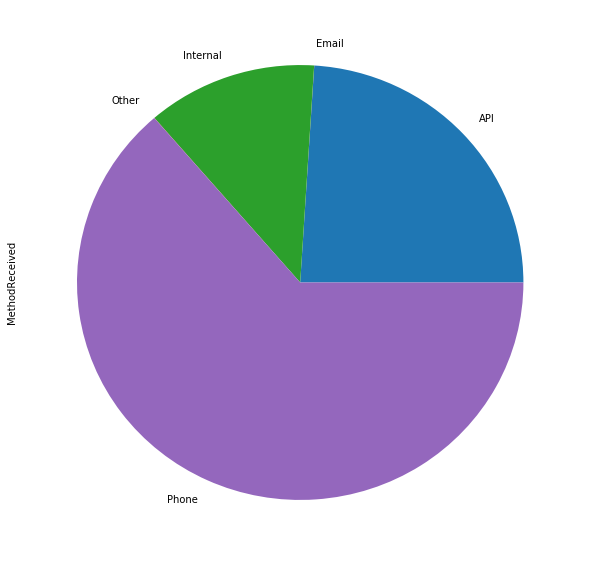

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
AverageNumberOfDays = df_service.groupby('MethodReceived')['MethodReceived'].count().plot.pie(subplots=True)

### 9. Find relationship between population and number of service request using 311 service request and Census Demographic datasets

Merging the Neighborhood and services from Services dataset and Population from Census demographic dataset for displaying the relationship between them. 

In [30]:
df_service1 = df_service.groupby(["Neighborhood"]).size()

In [31]:
df_services = pd.Series.to_frame(df_service1)
df_census2 = df_census1[['Neighborhood','Population']]

In [32]:
df_merged = pd.merge(df_census2,df_services, on='Neighborhood')

In [33]:
df_merged = df_merged.rename(columns={0:"Services"})

In [34]:
df_merged.head()

,Neighborhood,Population,Services
0,Bellona-Gittings,599.0,162
1,Cameron Village,1435.0,648
2,Cedarcroft,726.0,200
3,Chinquapin Park,1309.0,573
4,Loch Raven,6163.0,1604


Since the String values can not be plotted on 3D graph, we converted the values to numeric form. These numeric values will thus be used to plot graphs. 

In [35]:
neighborhood_num = {"Neighborhood": {"Bellona-Gittings":1,
"Cameron Village":2,
"Cedarcroft":3,
"Chinquapin Park":4,
"Loch Raven":5,
"Glen Oaks":6,
"Guilford":7,
"Homeland":8,
"Idlewood":9,
"Kenilworth Park":10,
"Kernewood":11,
"Lake Evesham":12,
"Lake Walker":13,
"Loyola/Notre Dame":14,
"Mid-Govans":15,
"New Northwood":16,
"Pen Lucy":17,
"Radnor-Winston":18,
"Ramblewood":19,
"Richnor Springs":20,
"Rosebank":21,
"Villages Of Homeland":22,
"Woodbourne Heights":23,
"Wilson Park":24,
"Evesham Park":25,
"Belvedere":26,
"York-Homeland":27}}

In [36]:
df_merged.replace(neighborhood_num, inplace = True)

In [37]:
df_merged.Neighborhood

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
Name: Neighborhood, dtype: int64

###### 3D plot is plotted against Neighborhood values which are converted into integers on x axis, Count of services for each neighborhood on y axis and Total Population on Z axis. Viridis colormap style is used. Lowest color shade shows highest population.

In [38]:
df_merged.Population

0      599.0000
1     1435.0000
2      726.0000
3     1309.0000
4     6163.0000
5     2887.0000
6     2214.0000
7     3201.0000
8     2676.0000
9     1206.0000
10     726.0000
11     543.0000
12    2095.0000
13    3208.0000
14    1465.0000
15    4972.0000
16    3078.0000
17     684.0000
18    1705.0000
19     676.0000
20     394.0000
21     562.3255
22    1795.0000
23     632.3202
24     709.0000
25     720.0000
26     482.6745
Name: Population, dtype: float64

###### 3D plot is plotted against Neighborhood values which are converted into integers on x axis, Count of services for each neighborhood on y axis and Total Population on Z axis. Viridis colormap style is used. Lowest color shade shows highest population.

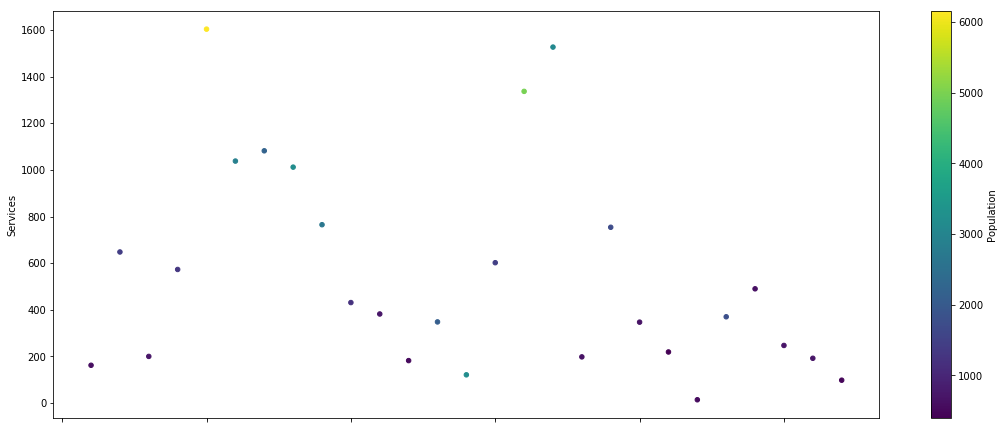

In [39]:
ax2  = df_merged.plot.scatter(x='Neighborhood', 
                              y='Services', 
                              c='Population',
                              colormap='viridis',
                              figsize=(18.5,7.5))

###### Plotting the 2D graph of Services vs Population shows that the Number of Service request for any given neighborhood in Baltimore are directly proportional to the total population in that particular area. There are negligible outliers which can be ignored. 

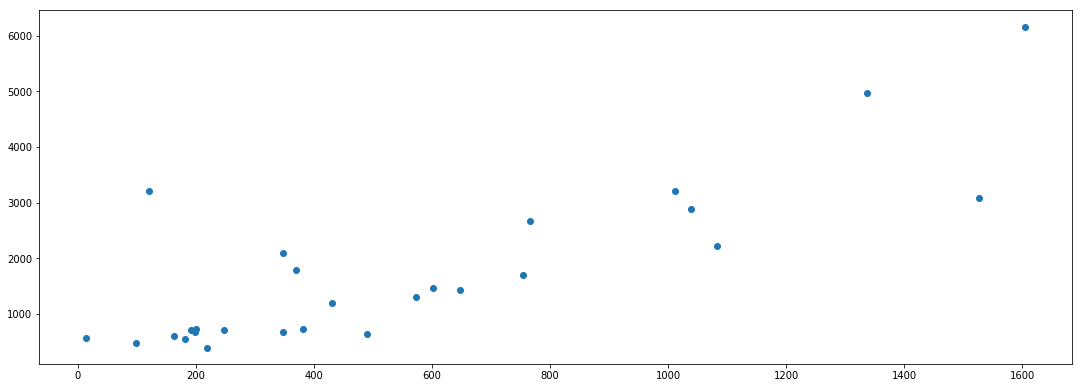

In [40]:
plt.figure(figsize=(18.5,6.5))
plt.scatter(df_merged['Services'], df_merged['Population'])
plt.show()

### 10. Plot relationship between majority of age groups and method of raising the service request. 

In [41]:
df_census1.columns

Index(['Neighborhood', 'Population', 'Male', 'Female', 'AGE0_4', 'AGE5_11',
       'AGE12_14', 'AGE15_17', 'AGE18_24', 'AGE25_34', 'AGE35_44', 'AGE45_64',
       'AGE65ovr', 'Young_citizens', 'Senior_citizens'],
      dtype='object')

In [42]:
df_cen_sorted = df_census1.sort_values(by=['Young_citizens'])
df_cen_sorted.head()

,Neighborhood,Population,Male,Female,AGE0_4,AGE5_11,AGE12_14,AGE15_17,AGE18_24,AGE25_34,AGE35_44,AGE45_64,AGE65ovr,Young_citizens,Senior_citizens
122,Johns Hopkins Homewood,18.0,8.0,10.0,4.0,0.0,0.0,0.0,1.0,8.0,4.0,1.0,0.0,17.0,1.0
19,Blythewood,72.0,38.0,34.0,2.0,12.0,2.0,5.0,1.0,2.0,12.0,20.0,16.0,36.0,36.0
116,Hopkins Bayview,103.0,46.0,57.0,2.0,3.0,1.0,2.0,2.0,17.0,12.0,20.0,44.0,39.0,64.0
50,Dickeyville,156.0,73.0,83.0,12.0,5.0,0.0,1.0,3.0,15.0,19.0,67.0,34.0,55.0,101.0
171,Saint Paul,107.0,55.0,52.0,9.0,14.0,5.0,3.0,8.0,19.0,16.0,24.0,9.0,74.0,33.0


In [43]:
df_cen_sorted.tail()

,Neighborhood,Population,Male,Female,AGE0_4,AGE5_11,AGE12_14,AGE15_17,AGE18_24,AGE25_34,AGE35_44,AGE45_64,AGE65ovr,Young_citizens,Senior_citizens
25,Brooklyn,9996.0,4870.0,5126.0,1055.0,1163.0,378.0,390.0,1132.0,1740.0,1237.0,2242.0,659.0,7095.0,2901.0
276,Charles Village,8906.0,4676.0,4230.0,146.0,58.0,26.0,47.0,4562.0,1792.0,731.0,1087.0,457.0,7362.0,1544.0
29,Canton,12192.0,6017.0,6175.0,512.0,232.0,80.0,88.0,1253.0,4835.0,1738.0,2192.0,1262.0,8738.0,3454.0
274,Belair-Edison,16690.0,7500.0,9190.0,1134.0,1734.0,794.0,873.0,1825.0,2251.0,2145.0,4675.0,1259.0,10756.0,5934.0
45,Frankford,17694.0,8056.0,9638.0,1383.0,1708.0,654.0,748.0,2180.0,2672.0,2269.0,4617.0,1463.0,11614.0,6080.0


In [44]:
df_service.loc[df_service['Neighborhood'] == 'Chinquapin Park'].groupby('MethodReceived').size()

MethodReceived
API          92
Internal     82
Phone       399
dtype: int64

In [45]:
neighborhood = df_merged['Neighborhood']
neighborhood = pd.Series.to_frame(neighborhood)
print(neighborhood)

    Neighborhood
0              1
1              2
2              3
3              4
4              5
5              6
6              7
7              8
8              9
9             10
10            11
11            12
12            13
13            14
14            15
15            16
16            17
17            18
18            19
19            20
20            21
21            22
22            23
23            24
24            25
25            26
26            27


In [46]:
df12 = df_service[['Neighborhood','MethodReceived']]
df12 = df12.sort_values(by=['Neighborhood'])
df12

,Neighborhood,MethodReceived
18002,Bellona-Gittings,Internal
18914,Bellona-Gittings,Phone
3143,Bellona-Gittings,API
6367,Bellona-Gittings,API
3175,Bellona-Gittings,API
17561,Bellona-Gittings,API
12066,Bellona-Gittings,API
12086,Bellona-Gittings,API
14089,Bellona-Gittings,API
14070,Bellona-Gittings,Phone


In [47]:
api = df_service[ (df_service.MethodReceived == 'API') | (df_service.MethodReceived == 'API')]
api = api.groupby('Neighborhood').size()
api = pd.Series.to_frame(api)
api_sorted = api.sort_values(by=['Neighborhood'])
api_sorted = api_sorted.rename(columns={0:"Api_count"})
type(api_sorted)

pandas.core.frame.DataFrame

In [48]:
df_cen_api = pd.merge(df_cen_sorted,api_sorted, on='Neighborhood')
df_cen_api

,Neighborhood,Population,Male,Female,AGE0_4,AGE5_11,AGE12_14,AGE15_17,AGE18_24,AGE25_34,AGE35_44,AGE45_64,AGE65ovr,Young_citizens,Senior_citizens,Api_count
0,York-Homeland,482.6745,204.898,277.7765,17.2415,24.2415,5.4765,4.9530,83.334,40.3955,47.6775,129.8250,129.5300,223.3195,259.3550,20
1,Rosebank,394.0000,181.000,213.0000,19.0000,28.0000,9.0000,7.0000,32.000,72.0000,71.0000,122.0000,34.0000,238.0000,156.0000,42
2,Bellona-Gittings,599.0000,286.000,313.0000,38.0000,58.0000,20.0000,21.0000,32.000,39.0000,69.0000,191.0000,131.0000,277.0000,322.0000,64
3,Lake Evesham,543.0000,275.000,268.0000,39.0000,47.0000,12.0000,13.0000,80.000,72.0000,88.0000,142.0000,50.0000,351.0000,192.0000,73
4,Wilson Park,632.3202,283.463,348.8572,42.6508,54.0926,34.9881,28.5463,73.418,80.4180,63.8717,174.8122,79.5225,377.9855,254.3347,152
5,Richnor Springs,676.0000,288.000,388.0000,38.0000,70.0000,26.0000,27.0000,55.000,83.0000,80.0000,185.0000,112.0000,379.0000,297.0000,45
6,Radnor-Winston,684.0000,312.000,372.0000,39.0000,72.0000,21.0000,14.0000,94.000,44.0000,107.0000,193.0000,100.0000,391.0000,293.0000,52
7,Belvedere,720.0000,339.000,381.0000,39.0000,57.0000,24.0000,25.0000,47.000,114.0000,86.0000,242.0000,86.0000,392.0000,328.0000,62
8,Cedarcroft,726.0000,352.000,374.0000,54.0000,101.0000,26.0000,21.0000,31.000,35.0000,127.0000,236.0000,95.0000,395.0000,331.0000,77
9,Villages Of Homeland,562.3255,210.102,352.2235,18.7585,22.7585,3.5235,9.0470,181.666,88.6045,72.3225,125.1750,40.4700,396.6805,165.6450,3


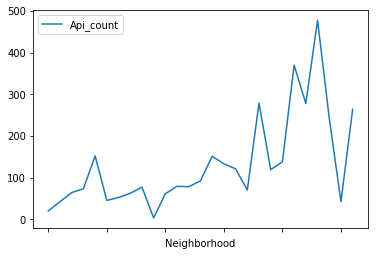

In [49]:
df_cen_api.plot.line(x='Neighborhood',y='Api_count')

In [50]:
df_cen_api_sorted = df_cen_api.sort_values(by=['Young_citizens'])
df_cen_api_sorted

,Neighborhood,Population,Male,Female,AGE0_4,AGE5_11,AGE12_14,AGE15_17,AGE18_24,AGE25_34,AGE35_44,AGE45_64,AGE65ovr,Young_citizens,Senior_citizens,Api_count
0,York-Homeland,482.6745,204.898,277.7765,17.2415,24.2415,5.4765,4.9530,83.334,40.3955,47.6775,129.8250,129.5300,223.3195,259.3550,20
1,Rosebank,394.0000,181.000,213.0000,19.0000,28.0000,9.0000,7.0000,32.000,72.0000,71.0000,122.0000,34.0000,238.0000,156.0000,42
2,Bellona-Gittings,599.0000,286.000,313.0000,38.0000,58.0000,20.0000,21.0000,32.000,39.0000,69.0000,191.0000,131.0000,277.0000,322.0000,64
3,Lake Evesham,543.0000,275.000,268.0000,39.0000,47.0000,12.0000,13.0000,80.000,72.0000,88.0000,142.0000,50.0000,351.0000,192.0000,73
4,Wilson Park,632.3202,283.463,348.8572,42.6508,54.0926,34.9881,28.5463,73.418,80.4180,63.8717,174.8122,79.5225,377.9855,254.3347,152
5,Richnor Springs,676.0000,288.000,388.0000,38.0000,70.0000,26.0000,27.0000,55.000,83.0000,80.0000,185.0000,112.0000,379.0000,297.0000,45
6,Radnor-Winston,684.0000,312.000,372.0000,39.0000,72.0000,21.0000,14.0000,94.000,44.0000,107.0000,193.0000,100.0000,391.0000,293.0000,52
7,Belvedere,720.0000,339.000,381.0000,39.0000,57.0000,24.0000,25.0000,47.000,114.0000,86.0000,242.0000,86.0000,392.0000,328.0000,62
8,Cedarcroft,726.0000,352.000,374.0000,54.0000,101.0000,26.0000,21.0000,31.000,35.0000,127.0000,236.0000,95.0000,395.0000,331.0000,77
9,Villages Of Homeland,562.3255,210.102,352.2235,18.7585,22.7585,3.5235,9.0470,181.666,88.6045,72.3225,125.1750,40.4700,396.6805,165.6450,3


In [51]:
df_cen_api_sorted.Neighborhood

0            York-Homeland
1                 Rosebank
2         Bellona-Gittings
3             Lake Evesham
4              Wilson Park
5          Richnor Springs
6           Radnor-Winston
7                Belvedere
8               Cedarcroft
9     Villages Of Homeland
10               Kernewood
11            Evesham Park
12         Kenilworth Park
13         Chinquapin Park
14         Cameron Village
15              Mid-Govans
16              Ramblewood
17      Woodbourne Heights
18                Guilford
19             Lake Walker
20                Idlewood
21                Homeland
22               Glen Oaks
23                Pen Lucy
24           New Northwood
25       Loyola/Notre Dame
26              Loch Raven
Name: Neighborhood, dtype: object

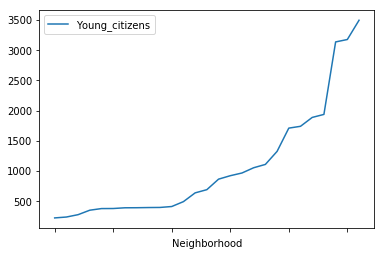

In [52]:
df_cen_api_sorted.plot.line(x='Neighborhood',y='Young_citizens')

##### This graph shows that their is a relationship between Young age group baltimore citizens in particular neighborhood and number of service requests that are sent using Internet.  

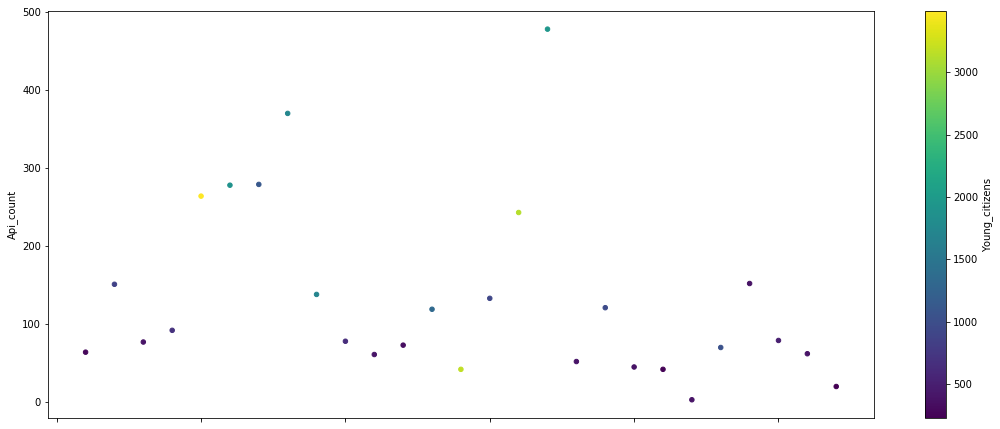

In [53]:
df_cen_api_sorted.replace(neighborhood_num, inplace = True)
ax2  = df_cen_api_sorted.plot.scatter(x='Neighborhood', 
                              y='Api_count', 
                              c='Young_citizens',
                              colormap='viridis',
                              figsize=(18.5,7.5))

### 11. Exploring which neighborhoods in Balrimore are safe, moderate or dangerous based on crimes. 

In [54]:
df_crime = df_crime.groupby(["Neighborhood"]).size()
type(df_crime)
df_crime

Neighborhood
Abell                         31
Allendale                     67
Arcadia                       21
Arlington                    101
Armistead Gardens             60
Ashburton                     33
Baltimore Highlands          143
Barclay                       93
Barre Circle                  13
Bayview                       50
Beechfield                    54
Belair-Edison                380
Belair-Parkside               11
Belvedere                     10
Berea                        124
Better Waverly               126
Beverly Hills                  5
Biddle Street                 49
Bolton Hill                   62
Boyd-Booth                    25
Brewers Hill                  19
Bridgeview/Greenlawn          58
Broadway East                234
Broening Manor                52
Brooklyn                     315
Burleith-Leighton             18
Butcher's Hill                43
CARE                          55
Callaway-Garrison             34
Cameron Village               

In [55]:
df_crime = pd.Series.to_frame(df_crime)
type(df_crime)

pandas.core.frame.DataFrame

In [56]:
df_cen_api_crime = pd.merge(df_cen_api,df_crime, on='Neighborhood')
df_cen_api_crime = df_cen_api_crime.rename(columns={0:"Crimes"})

In [57]:
df_cen_api_crime

,Neighborhood,Population,Male,Female,AGE0_4,AGE5_11,AGE12_14,AGE15_17,AGE18_24,AGE25_34,AGE35_44,AGE45_64,AGE65ovr,Young_citizens,Senior_citizens,Api_count,Crimes
0,York-Homeland,482.6745,204.898,277.7765,17.2415,24.2415,5.4765,4.9530,83.334,40.3955,47.6775,129.8250,129.5300,223.3195,259.3550,20,12
1,Rosebank,394.0000,181.000,213.0000,19.0000,28.0000,9.0000,7.0000,32.000,72.0000,71.0000,122.0000,34.0000,238.0000,156.0000,42,9
2,Lake Evesham,543.0000,275.000,268.0000,39.0000,47.0000,12.0000,13.0000,80.000,72.0000,88.0000,142.0000,50.0000,351.0000,192.0000,73,4
3,Wilson Park,632.3202,283.463,348.8572,42.6508,54.0926,34.9881,28.5463,73.418,80.4180,63.8717,174.8122,79.5225,377.9855,254.3347,152,18
4,Richnor Springs,676.0000,288.000,388.0000,38.0000,70.0000,26.0000,27.0000,55.000,83.0000,80.0000,185.0000,112.0000,379.0000,297.0000,45,12
5,Radnor-Winston,684.0000,312.000,372.0000,39.0000,72.0000,21.0000,14.0000,94.000,44.0000,107.0000,193.0000,100.0000,391.0000,293.0000,52,9
6,Belvedere,720.0000,339.000,381.0000,39.0000,57.0000,24.0000,25.0000,47.000,114.0000,86.0000,242.0000,86.0000,392.0000,328.0000,62,10
7,Cedarcroft,726.0000,352.000,374.0000,54.0000,101.0000,26.0000,21.0000,31.000,35.0000,127.0000,236.0000,95.0000,395.0000,331.0000,77,3
8,Villages Of Homeland,562.3255,210.102,352.2235,18.7585,22.7585,3.5235,9.0470,181.666,88.6045,72.3225,125.1750,40.4700,396.6805,165.6450,3,2
9,Kernewood,726.0000,330.000,396.0000,46.0000,63.0000,35.0000,34.0000,66.000,76.0000,92.0000,219.0000,95.0000,412.0000,314.0000,61,17


In [58]:
df_services = df_services.rename(columns={0:"Services"})
df_services

,Services
Neighborhood,
Bellona-Gittings,162
Belvedere,192
Cameron Village,648
Cedarcroft,200
Chinquapin Park,573
Evesham Park,247
Glen Oaks,1038
Guilford,1082
Homeland,1012


In [59]:
df_cen_api_crime = pd.merge(df_cen_api_crime,df_services, on='Neighborhood')

In [60]:
df_cen_api_crime

,Neighborhood,Population,Male,Female,AGE0_4,AGE5_11,AGE12_14,AGE15_17,AGE18_24,AGE25_34,AGE35_44,AGE45_64,AGE65ovr,Young_citizens,Senior_citizens,Api_count,Crimes,Services
0,York-Homeland,482.6745,204.898,277.7765,17.2415,24.2415,5.4765,4.9530,83.334,40.3955,47.6775,129.8250,129.5300,223.3195,259.3550,20,12,98
1,Rosebank,394.0000,181.000,213.0000,19.0000,28.0000,9.0000,7.0000,32.000,72.0000,71.0000,122.0000,34.0000,238.0000,156.0000,42,9,219
2,Lake Evesham,543.0000,275.000,268.0000,39.0000,47.0000,12.0000,13.0000,80.000,72.0000,88.0000,142.0000,50.0000,351.0000,192.0000,73,4,182
3,Wilson Park,632.3202,283.463,348.8572,42.6508,54.0926,34.9881,28.5463,73.418,80.4180,63.8717,174.8122,79.5225,377.9855,254.3347,152,18,490
4,Richnor Springs,676.0000,288.000,388.0000,38.0000,70.0000,26.0000,27.0000,55.000,83.0000,80.0000,185.0000,112.0000,379.0000,297.0000,45,12,347
5,Radnor-Winston,684.0000,312.000,372.0000,39.0000,72.0000,21.0000,14.0000,94.000,44.0000,107.0000,193.0000,100.0000,391.0000,293.0000,52,9,198
6,Belvedere,720.0000,339.000,381.0000,39.0000,57.0000,24.0000,25.0000,47.000,114.0000,86.0000,242.0000,86.0000,392.0000,328.0000,62,10,192
7,Cedarcroft,726.0000,352.000,374.0000,54.0000,101.0000,26.0000,21.0000,31.000,35.0000,127.0000,236.0000,95.0000,395.0000,331.0000,77,3,200
8,Villages Of Homeland,562.3255,210.102,352.2235,18.7585,22.7585,3.5235,9.0470,181.666,88.6045,72.3225,125.1750,40.4700,396.6805,165.6450,3,2,14
9,Kernewood,726.0000,330.000,396.0000,46.0000,63.0000,35.0000,34.0000,66.000,76.0000,92.0000,219.0000,95.0000,412.0000,314.0000,61,17,382


##### Ploting the bar graph that shows the neighborhoods which are safe, moderately safe and dangerous based on the crime rate at every neighborhood. 

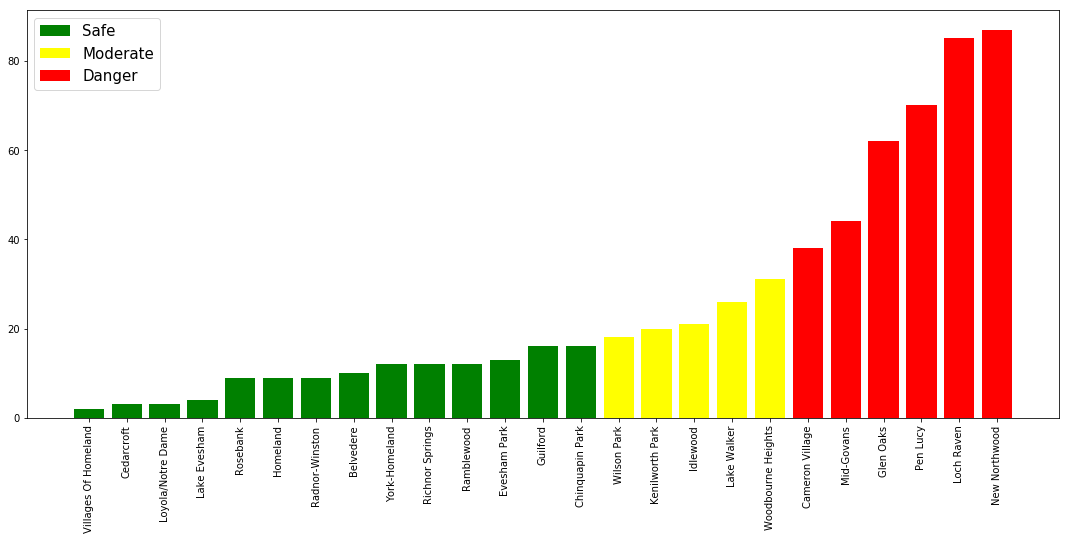

In [61]:
import matplotlib.patches as mpatches

df_cen_api_crime = df_cen_api_crime.sort_values(by=['Crimes'])
x= df_cen_api_crime['Neighborhood']
y = df_cen_api_crime['Crimes']
filter1 = y<17
filter2 = y>17
filter3 = y > 35

Safety = ['Safe', 'Moderate', 'Danger']

plt.figure(figsize=(18.5,7.5))
plt.xticks(rotation=90)
plt.bar(x[filter1],y[filter1], color='green')
plt.bar(x[filter2],y[filter2], color='yellow')
plt.bar(x[filter3],y[filter3], color='red')
plt.legend(Safety, prop={'size':15})
plt.show()
#df_cen_api_crime.plot.bar(x='Neighborhood', y='Crimes', figsize=(18.5,7.5))

## 12. Exploring different types of methods in which the requests are received based on neighborhood

In [62]:
api = df_service[ (df_service.MethodReceived == 'API')]
api = api.groupby('Neighborhood').size()
api = pd.Series.to_frame(api)
api_sorted = api.sort_values(by=['Neighborhood'])
api_sorted = api_sorted.rename(columns={0:"Api_count"})
type(api_sorted)

pandas.core.frame.DataFrame

In [63]:
api_sorted

,Api_count
Neighborhood,
Bellona-Gittings,64
Belvedere,62
Cameron Village,151
Cedarcroft,77
Chinquapin Park,92
Evesham Park,79
Glen Oaks,278
Guilford,279
Homeland,370


#### Only citizen belonging to Pen Lucy neighborhood has used Email to raise service request

In [64]:
email = df_service[(df_service.MethodReceived == 'Email')]
email = email.groupby('Neighborhood').size()
email = pd.Series.to_frame(email)
email_sorted = email.sort_values(by=['Neighborhood'])
email_sorted = email_sorted.rename(columns={0:"Email_count"})
email_sorted

,Email_count
Neighborhood,
Pen Lucy,1


In [65]:
Internal = df_service[ (df_service.MethodReceived == 'Internal')]
Internal = Internal.groupby('Neighborhood').size()
Internal = pd.Series.to_frame(Internal)
Internal_sorted = Internal.sort_values(by=['Neighborhood'])
Internal_sorted = Internal_sorted.rename(columns={0:"Internal_count"})
Internal_sorted

,Internal_count
Neighborhood,
Bellona-Gittings,6
Belvedere,16
Cameron Village,83
Cedarcroft,23
Chinquapin Park,82
Evesham Park,27
Glen Oaks,132
Guilford,188
Homeland,177


In [66]:
Phone = df_service[ (df_service.MethodReceived == 'Phone')]
Phone = Phone.groupby('Neighborhood').size()
Phone = pd.Series.to_frame(Phone)
Phone_sorted = Phone.sort_values(by=['Neighborhood'])
Phone_sorted = Phone_sorted.rename(columns={0:"Phone_count"})
Phone_sorted

,Phone_count
Neighborhood,
Bellona-Gittings,92
Belvedere,114
Cameron Village,414
Cedarcroft,100
Chinquapin Park,399
Evesham Park,141
Glen Oaks,628
Guilford,615
Homeland,465


In [67]:
Other = df_service[ (df_service.MethodReceived == 'Other')]
Other = Other.groupby('Neighborhood').size()
Other = pd.Series.to_frame(Other)
Other_sorted = Other.sort_values(by=['Neighborhood'])
Other_sorted = Other_sorted.rename(columns={0:"Other_count"})
Other_sorted

,Other_count
Neighborhood,
Idlewood,1
Wilson Park,1


In [68]:
df_service_merge = pd.merge(api_sorted,email_sorted, on='Neighborhood', how='outer')
df_service_merge = pd.merge(df_service_merge,Phone_sorted, on='Neighborhood', how='outer')
df_service_merge = pd.merge(df_service_merge,Other_sorted, on='Neighborhood', how='outer')
df_service_merge = pd.merge(df_service_merge,Internal_sorted, on='Neighborhood', how='outer')
df_service_merge = df_service_merge.fillna(0)
df_service_merge

,Api_count,Email_count,Phone_count,Other_count,Internal_count
Neighborhood,,,,,
Bellona-Gittings,64,0.0,92,0.0,6.0
Belvedere,62,0.0,114,0.0,16.0
Cameron Village,151,0.0,414,0.0,83.0
Cedarcroft,77,0.0,100,0.0,23.0
Chinquapin Park,92,0.0,399,0.0,82.0
Evesham Park,79,0.0,141,0.0,27.0
Glen Oaks,278,0.0,628,0.0,132.0
Guilford,279,0.0,615,0.0,188.0
Homeland,370,0.0,465,0.0,177.0


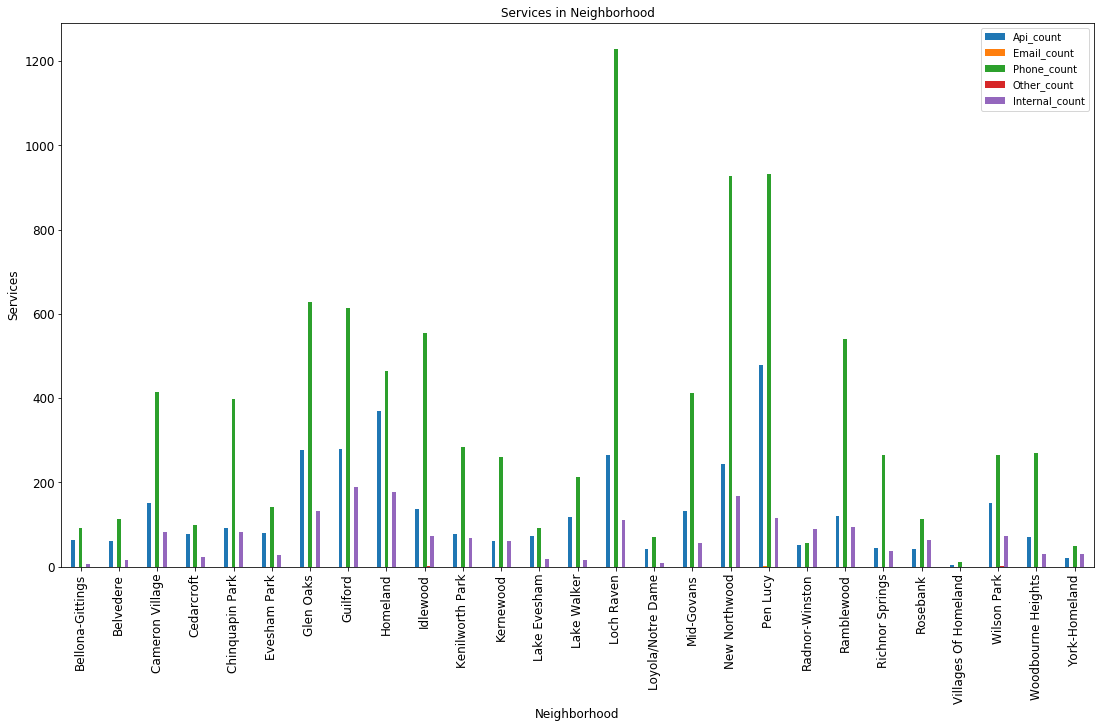

In [69]:
ax = df_service_merge[['Api_count','Email_count','Phone_count','Other_count','Internal_count']].plot(kind='bar', title ="Services in Neighborhood", figsize=(18.5, 10), legend=True, fontsize=12)
ax.set_xlabel("Neighborhood", fontsize=12)
ax.set_ylabel("Services", fontsize=12)
plt.show()

###### We can conclude from above graph that majority of service requests comes from Loch Raven and New Northwood where as Village of Homelands shows the least number of Service requests.  

## 13. District-wise distribution of topmost Crime Codes and their corresponding neighborhoods

In [70]:
df_crimecode = df3.groupby('CrimeCode').size()
df_crimecode = pd.Series.to_frame(df_crimecode)
df_crimecode = df_crimecode.rename(columns={0: 'CountOfCrimeCode'})
df_crimecode = df_crimecode.sort_values(by=['CountOfCrimeCode'], ascending = False)
df_crimecode.head(5)

,CountOfCrimeCode
CrimeCode,
4E,9257
6D,7032
5A,4719
7A,3472
6G,3292


In [71]:
df_crime_district = df3[['CrimeCode','District']]
df_crime_district = df_crime_district[(df_crime_district['CrimeCode'] == '7A')]
df_crime_district.head()

,CrimeCode,District
73,7A,SOUTHWESTERN
81,7A,WESTERN
97,7A,CENTRAL
100,7A,NORTHWESTERN
131,7A,NORTHEASTERN


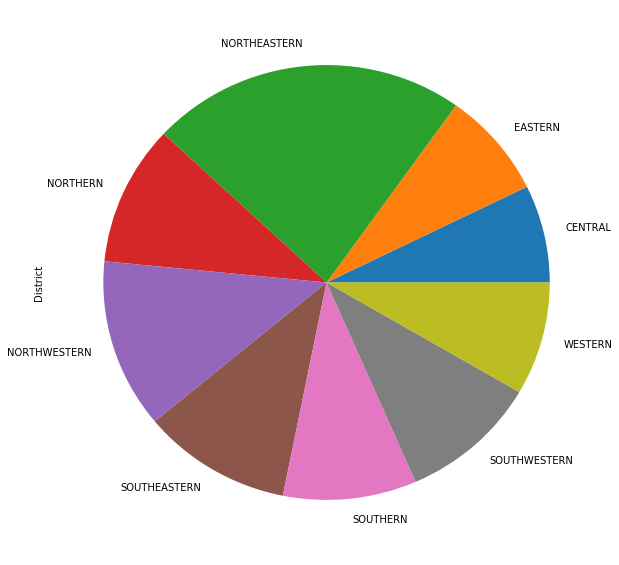

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
CrimeInDistrict = df_crime_district.groupby('District')['District'].count().plot.pie(subplots=True)

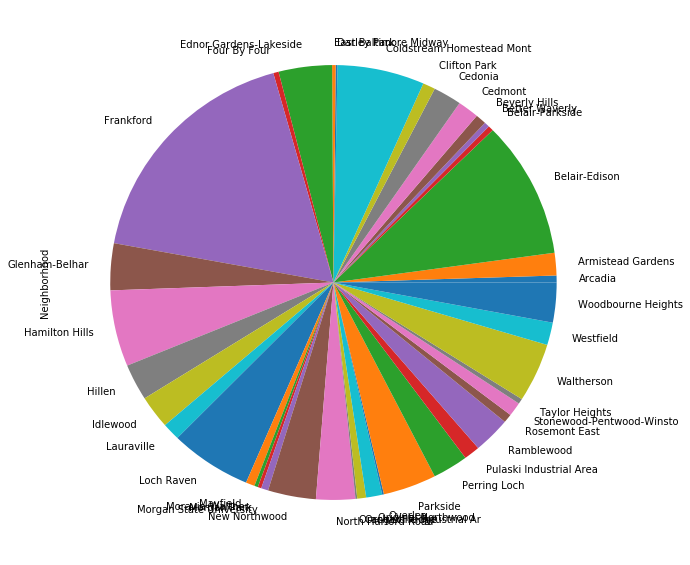

In [93]:
df_crime_district_neighborhood = df3[['CrimeCode','District','Neighborhood']]
df_crime_district_neighborhood = df_crime_district_neighborhood[(df_crime_district_neighborhood['CrimeCode'] == '7A')]
df_crime_district_neighborhood = df_crime_district_neighborhood[(df_crime_district_neighborhood['District'] == 'NORTHEASTERN')]

fig, ax = plt.subplots(figsize=(10,10))
df_crime_district_neighborhood = df_crime_district_neighborhood.groupby('Neighborhood')['Neighborhood'].count().plot.pie(subplots=True)

### Since Loch Raven shows highest number of Crime rate as well as highest number of service requsts, let's dig more into the type of service requests they encounter. 

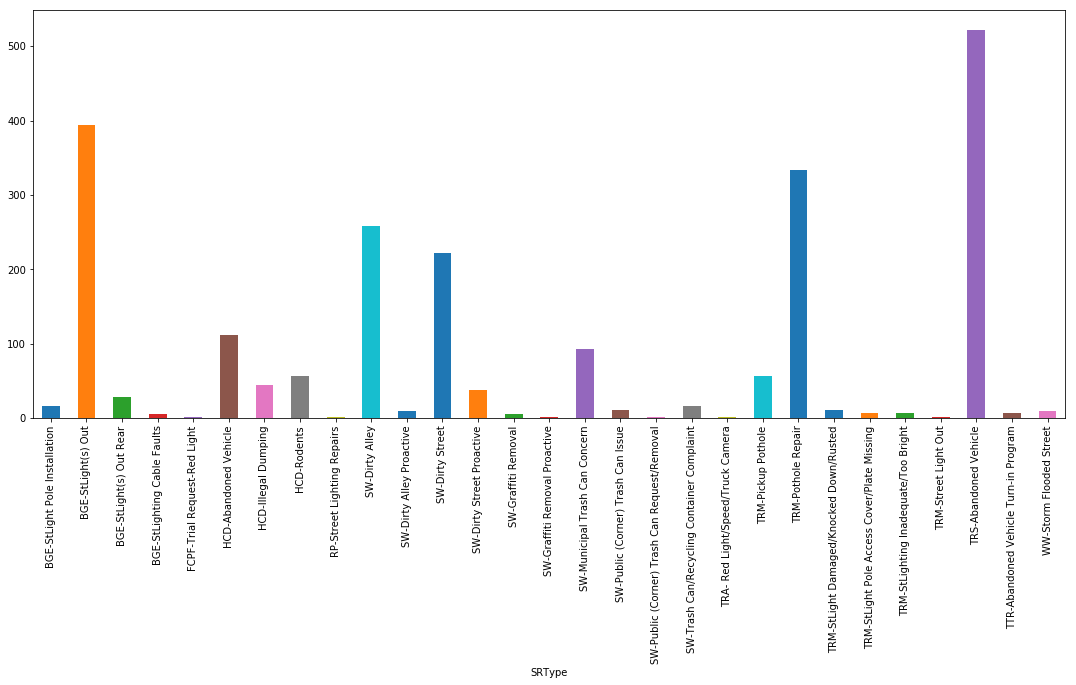

In [94]:
df_service_method = df[['SRType','Neighborhood']]
df_service_method = df_service_method[(df_service_method['Neighborhood'] == 'Loch Raven')]
df_service_method = df_service_method.groupby('SRType').size()


df_service_method.plot.bar(figsize=(18.5,7.5))

#### Above graph shows that the Loch raven raises Abandoned Vehicles and Street lights out service requests the most. 

## 14. Displaying direct relationship between the number of service requests and the crimes 

In [76]:
response = df_service.groupby(['Neighborhood'])['DaysRequired'].mean()
response = pd.Series.to_frame(response)

In [77]:
df_cen_api_crime_days = df_cen_api_crime[['Neighborhood','Population','Young_citizens','Senior_citizens','Api_count','Crimes','Services']]

In [78]:
df_cen_api_crime_days = pd.merge(df_cen_api_crime_days,response, on='Neighborhood')

In [79]:
df_cen_api_crime_days.sort_values(by=['Crimes'])

,Neighborhood,Population,Young_citizens,Senior_citizens,Api_count,Crimes,Services,DaysRequired
0,Villages Of Homeland,562.3255,396.6805,165.6450,3,2,14,5.428571
1,Cedarcroft,726.0000,395.0000,331.0000,77,3,200,4.270000
2,Loyola/Notre Dame,3208.0000,3177.0000,31.0000,42,3,121,2.611570
3,Lake Evesham,543.0000,351.0000,192.0000,73,4,182,2.637363
4,Rosebank,394.0000,238.0000,156.0000,42,9,219,3.433790
5,Homeland,3201.0000,1740.0000,1461.0000,370,9,1012,3.064229
6,Radnor-Winston,684.0000,391.0000,293.0000,52,9,198,3.883838
7,Belvedere,720.0000,392.0000,328.0000,62,10,192,4.135417
8,York-Homeland,482.6745,223.3195,259.3550,20,12,98,2.857143
9,Richnor Springs,676.0000,379.0000,297.0000,45,12,347,4.544669


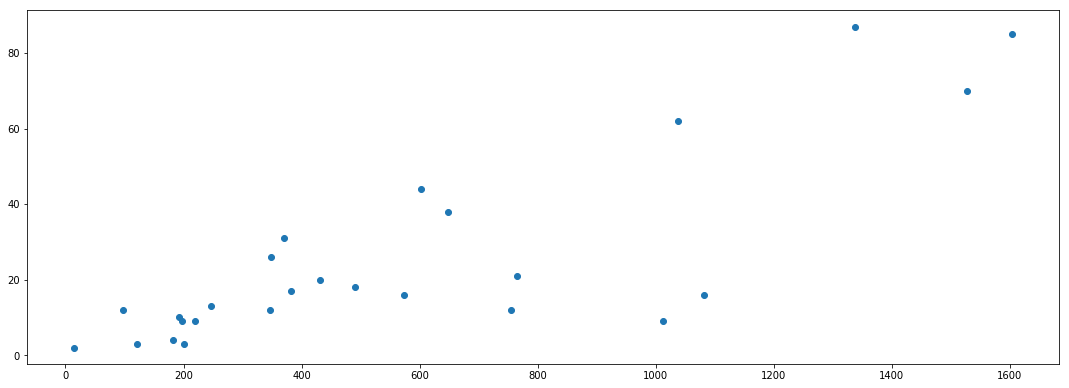

In [95]:
plt.figure(figsize=(18.5,6.5))
plt.scatter(df_cen_api_crime_days['Services'], df_cen_api_crime_days['Crimes'])
plt.show()

From the above graph we can see that the Services requested are directly proportional to the crimes in a neighborhood. It tells us that as the crime in an area increases, the request raised for services increases.

## 15. Graphs we tried but could not find any relationship

> <p>Since we found above that services are directly proportional to crime, we tried to find relation between crimes and the days required to resolve the service request. We were expecting a graph which shows that the particular neighborhood has more crimes as the services are not resolved on time. But the actual output did not show this expected result.

In [80]:
df3.dropna()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
0,1/1/2012,4A,500 CHATEAU AV,AGG. ASSAULT,FIREARM,NORTHERN,Winston-Govans
1,1/1/2012,4E,2200 W NORTH AV,COMMON ASSAULT,HANDS,WESTERN,Coppin Heights/Ash-Co-Eas
2,1/1/2012,4E,0 S LINWOOD AV,COMMON ASSAULT,HANDS,SOUTHEASTERN,Patterson Park Neighborho
6,1/1/2012,4E,500 N GLOVER ST,COMMON ASSAULT,HANDS,SOUTHEASTERN,McElderry Park
7,1/1/2012,4E,4900 GOODNOW RD,COMMON ASSAULT,HANDS,NORTHEASTERN,Frankford
11,1/1/2012,4C,500 LONEYS LA,AGG. ASSAULT,OTHER,SOUTHEASTERN,Ellwood Park/Monument
12,1/1/2012,4E,1500 GORSUCH AV,COMMON ASSAULT,HANDS,NORTHEASTERN,Coldstream Homestead Mont
14,1/1/2012,4C,400 E BALTIMORE ST,AGG. ASSAULT,OTHER,CENTRAL,Downtown
18,1/1/2012,4E,300 N HIGHLAND AV,COMMON ASSAULT,HANDS,SOUTHEASTERN,Baltimore Highlands
20,1/1/2012,4C,2000 GRINNALDS AV,AGG. ASSAULT,OTHER,SOUTHWESTERN,Morrell Park


Below graph is plotted against Days required to solve a service request and Crimes 

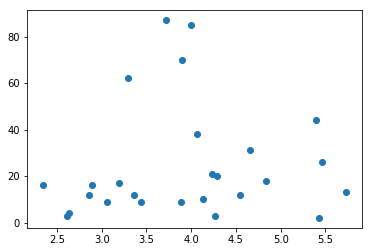

In [81]:
#df_cen_api_crime_days.scatter(x='DaysRequired',y='Crimes')

plt.scatter(df_cen_api_crime_days['DaysRequired'], df_cen_api_crime_days['Crimes'])
plt.show()

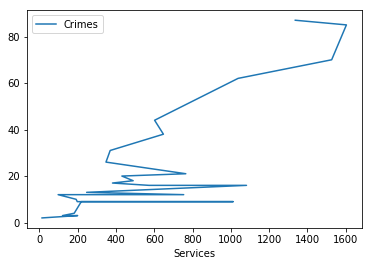

In [82]:
df_cen_api_crime_days.plot(x='Services',y='Crimes')

### What were the insights gained from the data?
> <ul><b>
    <p><li> Based on the scattered plot, we came to the conclusion that population and service requests are directly proportional. As the population increases, the number of service requests also increases.</li></p>
    <p><li>There is a direct relationship between the age groups in particular neighborhood and way in which the maximum requests are raised there. For example, requests raised using APIs were maximum in the neighborhoods where there was a majoriy of young crowd and the area where senior citizens were in majority shows maximum amount of requests raised using phone calls. </li></p>
    <p><li>We tried to display the safety of some baltimore neighborhood based on the number of crimes occuring in each. The area whcih is most dangerous was New Northwood and lochraven whereas Villages of Homeland and Cedarcroft are the safest neighborhoods. We have ploted the bar graphs showing degree of safety for each neighborhood using different colors.</li></p>
    <p><li>The number of service requests were higher where large number of crimes occured. We can infer from this that since the crimes were more, there were lot of issues in the public services prvided or may be other way round.</li></p>
    <p><li>Auto theft, Common Assault, Burglary are some of the highly occuring crimes in Baltimore.</li></p>
    <p><li>Taking into consideration Auto theft crime (Type of crime that occured maximum), Northeastern districts has maximum occurances of this crime particularly, Frankfort and Belair-Edison Neighborhoods of this district.</li></p>
    <p><li>As we found above that Loch ravens is most dangerous neighborhood, we also found that the TRS-abandoned vehicles and BGE-street lights out are the highest services that are requests here. We can conclude from this that due to frequently occuring street lights out, crimes can occur more here as is seen via plots.</li></p>
    </b></ul>


### Why is what we were trying to do valuable, and what did we learn? 
> <p><ul><b>
        The dataset that we are trying to plot is valuable in a sense that it gives the insight of the how safe is the area where we stay. Also, the population ditsribution based on age, gender etc can be understod. The relation between the age groups and method of raising requests can be interesting to know about what mode of communication is prefered by which age groups. Crime and service requests relationship will give us insights of how the number of service requests are impacted based on crimes occuring in any given neighborhood.  
  </b></ul></p>


### Why would someone else be interested in knowing what we learned? How might they use that knowledge?
<p><ul><b> 
    Someone staying in baltimore will be interested to know which is the safe neighbourhood and which is the dangerous so that the person can make the decision for accomodation. People will also be interested in our insights which shows how fast does the service is handled in which heighborhood of baltimore. The further study can be made to check the root causes of why the particular neighborhood takes longer to resolve service requests. This might help to know the scope of improvement in the performance. 
</b></ul></p>